In [17]:
# Model dependencies
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree


In [18]:
# other python dependencies

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [19]:
# importing data

# Study data files
file_path = "AirbnbData.csv"


# Read the mouse data and the study results
airbnb_df = pd.read_csv(file_path)

airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [22]:
# creating a copy of the dataset to work with in case anything happens
dataset = airbnb_df.copy()

# replacing NaN with 0
dataset.fillna(0, inplace = True)

dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [23]:
# dropping rows with prices above $1000 a night 
dataset.drop(dataset.index[dataset['price'] > 1000], inplace = True)

In [24]:
# dropping columns not needed
dataset = dataset.drop(columns=["id","name","host_id","host_name",
                                "last_review","neighbourhood","latitude","longitude","minimum_nights", 
                                "number_of_reviews","calculated_host_listings_count"])

# droping index
dataset.reset_index(drop=True, inplace=True)

# previewing data
dataset.head()

,neighbourhood_group,room_type,price,reviews_per_month,availability_365
0,Brooklyn,Private room,149,0.21,365
1,Manhattan,Entire home/apt,225,0.38,355
2,Manhattan,Private room,150,0.00,365
3,Brooklyn,Entire home/apt,89,4.64,194
4,Manhattan,Entire home/apt,80,0.10,0


In [25]:
# Reformat data

# encoding categorical data
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')



# view shape of x data and preview
print(dataset.shape)
dataset.head()

(48656, 11)


,price,reviews_per_month,availability_365,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room
0,149,0.21,365,0,1,0,0,0,0,1,0
1,225,0.38,355,0,0,1,0,0,1,0,0
2,150,0.00,365,0,0,1,0,0,0,1,0
3,89,4.64,194,0,1,0,0,0,1,0,0
4,80,0.10,0,0,0,1,0,0,1,0,0


In [26]:
# splitting dataset into x and y
x = dataset.drop(columns=["price"])
y = dataset["price"]

In [27]:
feature_names = x.columns

In [28]:
# reshaping y data inorder to use standard scaler 
# y = y.values.reshape(-1,1)

In [29]:
# Split data into training and testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=101)

In [30]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
x_scaler = StandardScaler().fit(x_train)
# y_scaler = StandardScaler().fit(y_train)

In [31]:
# Transform the training and testing data using the X_scaler

x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)

# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)

In [32]:
# print(y_train_scaled.shape)
# print(y_test_scaled.shape)

# print(x_train_scaled.shape)
# print(x_test_scaled.shape)

In [33]:
regr = RandomForestRegressor(max_depth=200, random_state=1)

regr.fit(x_train_scaled, y_train)

RandomForestRegressor(max_depth=200, random_state=1)

In [35]:
regr.score(x_test_scaled, y_test)

0.20639238390478754

In [36]:
sorted(zip(regr.feature_importances_, feature_names), reverse=True)

[(0.3252584527966018, 'availability_365'),
 (0.2989835861877658, 'Entire home/apt'),
 (0.2922693593334491, 'reviews_per_month'),
 (0.06651932058358954, 'Manhattan'),
 (0.006031165015226695, 'Brooklyn'),
 (0.0029815346045334494, 'Bronx'),
 (0.0026715675591702823, 'Queens'),
 (0.0019195642317967098, 'Private room'),
 (0.0018666359818899402, 'Shared room'),
 (0.0014988137059767036, 'Staten Island')]

In [ ]:
[(0.22440739921382594, 'Entire home/apt'),
 (0.22242113181683457, 'longitude'),
 (0.18500315075543142, 'latitude'),
 (0.11516373115267317, 'availability_365'),
 (0.0698255172011168, 'reviews_per_month'),
 (0.0659061605445278, 'minimum_nights'),
 (0.06318887295286332, 'number_of_reviews'),
 (0.04508442008426929, 'calculated_host_listings_count'),
 (0.0023156135137875735, 'Manhattan'),
 (0.0018840797794750298, 'Brooklyn'),
 (0.0015796225168327024, 'Shared room'),
 (0.0014440044030872214, 'Private room'),
 (0.0012181951892447438, 'Queens'),
 (0.00048686232293310817, 'Bronx'),
 (7.123855309734359e-05, 'Staten Island')]

KeyError: "['minimum_nights'] not in index"

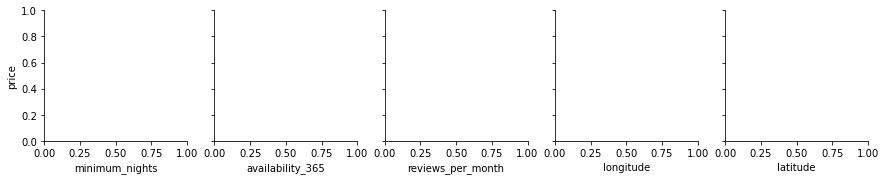

In [37]:
sns.pairplot(data = dataset,
             x_vars = ['availability_365','reviews_per_month'],
             y_vars = ['price'], diag_kind='kde')


# sns.pairplot(dataset[['price', 'minimum_nights', 'availability_365',
#                       'reviews_per_month', 'longitude','latitude']], diag_kind='kde')

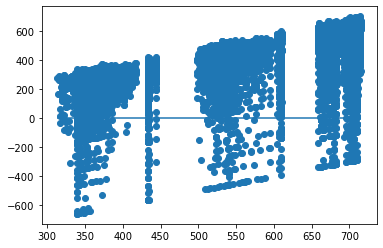

In [21]:
predictions = regr.predict(x)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()